<a href="https://colab.research.google.com/github/Sadikshya-dhakal/AI/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates **Principal Component Analysis (PCA)** in a simple, visual way. It starts by **standardizing the data** so all features are on the same scale. Then it calculates the **covariance matrix** to see how the features vary together and finds the **eigenvalues and eigenvectors**, which tell us the main directions (principal components) of variation in the data. The data is then **projected onto the first principal component**, which captures the **largest amount of variation**, effectively reducing the data from 2D to 1D while keeping the most important information. The plot shows both the original data and the **projected points along the main direction**, helping us visualize how PCA simplifies the data while preserving its key patterns.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
X = np.array([
    [2.5, 2.4],
    [0.5,0.7],
    [2.2,2.9],
    [1.9,2.2],
    [3.1,3.0],
    [2.3,2.7],
    [2.0,1.6],
[1.0,1.1],
[1.5,1.6],

[1.1,0.9]
    ])

In [ ]:
X_mean=np.mean(X, axis=0)
X_std=np.std(X, axis=0)
Z=(X-X_mean)/X_std

In [ ]:
cov_matrix=np.cov(Z.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[1.11111111 1.0288103 ]
 [1.0288103  1.11111111]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.13992141 0.08230081]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [ ]:
pc1 = Z @ eigenvectors[:, 0]

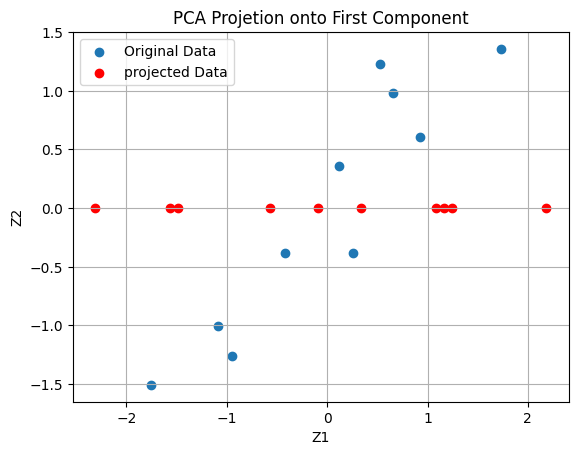

In [ ]:
plt.scatter(Z[:,0], Z[:, 1], label="Original Data")
plt.scatter(pc1, np.zeros_like(pc1), color='red', label="projected Data")
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.title("PCA Projetion onto First Component")
plt.legend()
plt.grid(True)
plt.show()

This code demonstrates **dimensionality reduction using both PCA and Kernel PCA** on different datasets, with clear visualizations.
1. **Synthetic Classification Data:**

   * A dataset with **1000 samples and 20 features** is created for a binary classification problem.
   * The code plots a couple of feature pairs (X1 vs X7, X1 vs X2) with colors representing the two classes, helping to **visualize how the classes are distributed in the original feature space**.

2. **Standard PCA:**

   * The data is **standardized** so all features have the same scale.
   * PCA is applied to reduce the dataset to **4 principal components**.
   * Scatter plots of the first two components and the next two components show how PCA **captures the main directions of variance** in the data.

3. **Cumulative Variance Plot:**

   * By fitting PCA with all 20 features, the code calculates the **cumulative variance explained** by the components.
   * A bar plot shows how many principal components are needed to capture a certain percentage (e.g., 80%) of the total variance, helping **decide how much dimensionality reduction is possible without losing much information**.

4. **Kernel PCA:**

   * A **non-linear dataset (moons)** is created, which cannot be easily separated in the original 2D space.
   * Kernel PCA with an **RBF kernel** is applied to transform the data into a space where the two classes become more separable.
   * Side-by-side scatter plots show the **original data** and the **transformed data**, illustrating how Kernel PCA can handle non-linear patterns that standard PCA cannot.




In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    random_state=42
)

In [ ]:
mycolors = {0:'red', 1:'green'}
labelColors = pd.Series(y).apply(lambda x: mycolors[x])

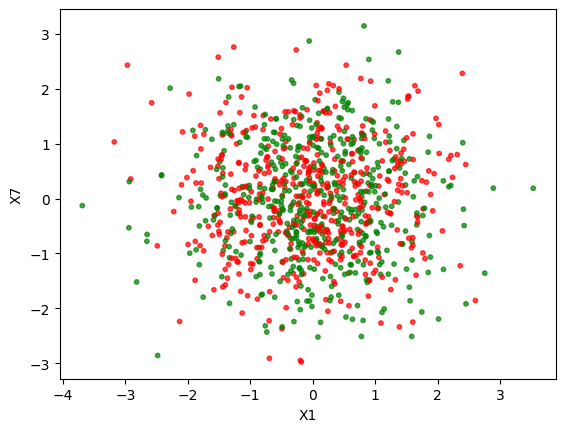

In [ ]:
plt.scatter(X[:,0],X[:,6], marker="o", alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X7")
plt.show()

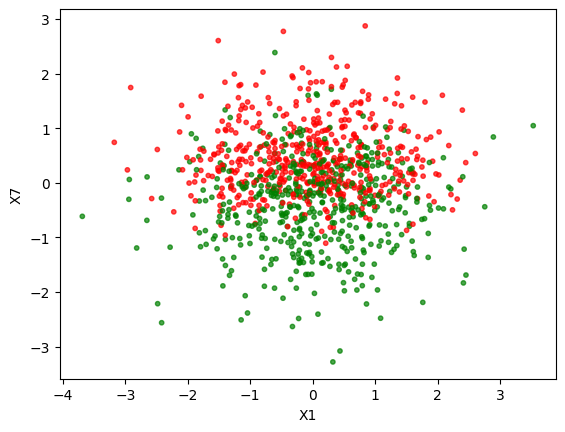

In [ ]:
plt.scatter(X[:,0],X[:,1], marker="o", alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X7")
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X
                                )

In [ ]:
pca  = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

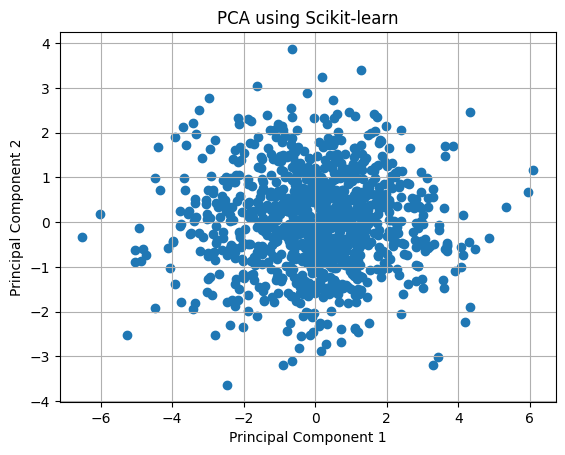

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA using Scikit-learn")
plt.grid(True)
plt.show()

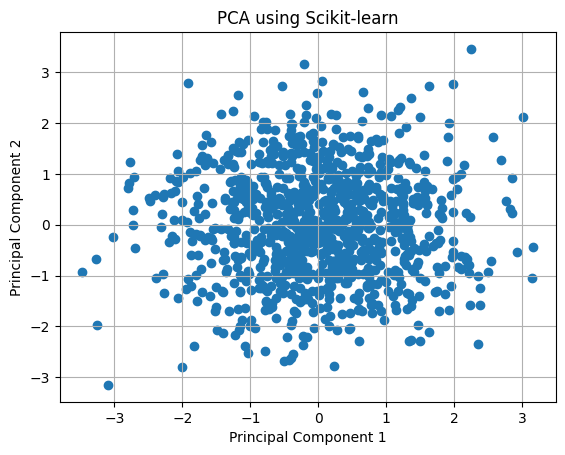

In [ ]:
plt.scatter(X_pca[:, 2], X_pca[:, 3])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA using Scikit-learn")
plt.grid(True)
plt.show()

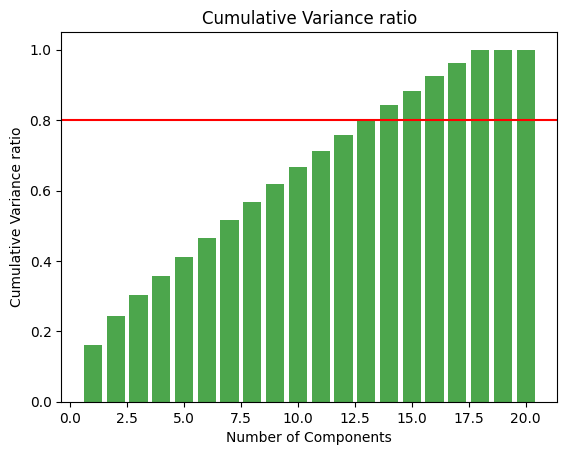

In [ ]:
N=20
pca=PCA(n_components = N)
pca.fit(X)
CVRs = np.cumsum(pca.explained_variance_ratio_)
nPCs = np.arange(N)+1
plt.bar(nPCs, CVRs, color='green', alpha=0.7)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance ratio")
plt.title("Cumulative Variance ratio")
plt.show()

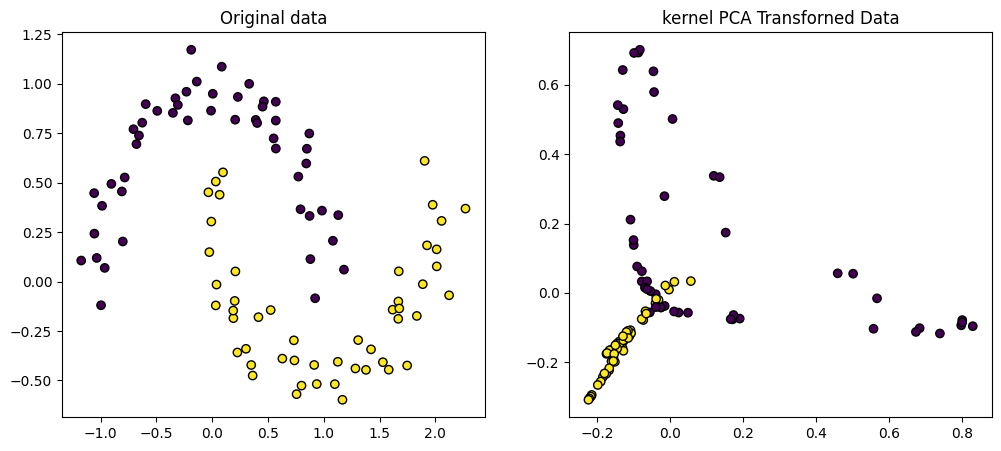

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons

X, y=make_moons(n_samples=100, noise=0.1, random_state=42)
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("Original data")

plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:,0], X_kpca[:, 1], c=y, edgecolors='k', marker='o')
plt.title("kernel PCA Transforned Data")

plt.show()